In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:
t_vals = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i_vals = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

df = pd.DataFrame({'t': t_vals, 'i': i_vals})
df

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
L = 0.98
R = 0.142

def diferencias_finitas(t,i):
  return np.gradient(i_vals, t_vals)

def tres_puntos(t,i):
  di_dt = np.zeros_like(i)
  h = t[1] - t[0]
  for j in range (1, len(i)-1):
    di_dt[j] = (i[j+1] - i[j-1])/(2*h)
  di_dt[0] = (-3*i[0] + 4*i[1] - i[2])/(2*h)
  di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3])/(2*h)
  return di_dt

diferencias_finitas_vals = diferencias_finitas(t_vals, i_vals)
tres_puntos_vals = tres_puntos(t_vals, i_vals)

print("Diferencias finitas: ", diferencias_finitas_vals)
print("Tres puntos: ", tres_puntos_vals)

Diferencias finitas:  [2. 2. 3. 5. 6.]
Tres puntos:  [2. 2. 3. 5. 7.]


Polinomio de interpolación:             4             3             2
-8.333e+04 x + 3.417e+05 x - 5.252e+05 x + 3.587e+05 x - 9.186e+04
Derivada del polinomio de interpolación:             3             2
-3.333e+05 x + 1.025e+06 x - 1.05e+06 x + 3.587e+05


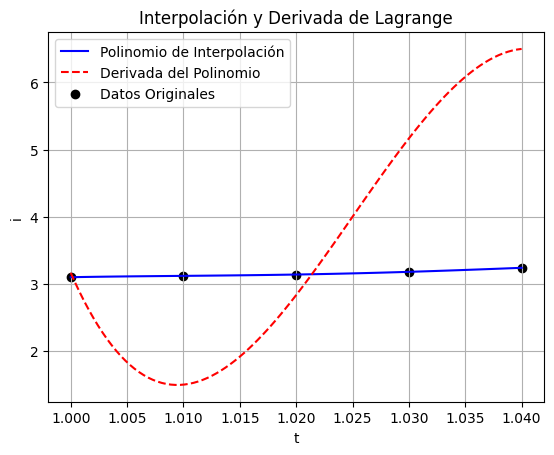

In [ ]:
from scipy.interpolate import lagrange

polinomio_interpolacion = lagrange(t_vals, i_vals)
print(f'Polinomio de interpolación: {polinomio_interpolacion}')

derivada_exacta = polinomio_interpolacion.deriv()
derivada_exacta_vals = derivada_exacta(t_vals)
print(f'Derivada del polinomio de interpolación: {derivada_exacta}')

t_fine = np.linspace(min(t_vals), max(t_vals), 100)
i_interp = polinomio_interpolacion(t_fine)
di_interp = derivada_exacta(t_fine)

plt.plot(t_fine, i_interp, label='Polinomio de Interpolación', linestyle='-', color='blue')
plt.plot(t_fine, di_interp, label='Derivada del Polinomio', linestyle='--', color='red')
plt.scatter(t_vals, i_vals, color='black', marker='o', label='Datos Originales')
plt.xlabel('t')
plt.ylabel('i')
plt.legend()
plt.title('Interpolación y Derivada de Lagrange')
plt.grid()
plt.show()


La derivada "exacta" que se obtuvo a partir de diferenciar el polinomio de interpolación de lagrange construido con los datos dados, coincide en las derivadas numéricas obtenidas mediante el método de diferencias finitas y el de tres puntos, a excepción del primero (que debería ser 2 pero en la gráfica es 3).

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

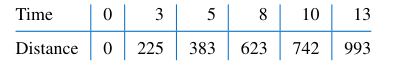



[75.         77.4        79.4        67.7        69.16666667 83.66666667]


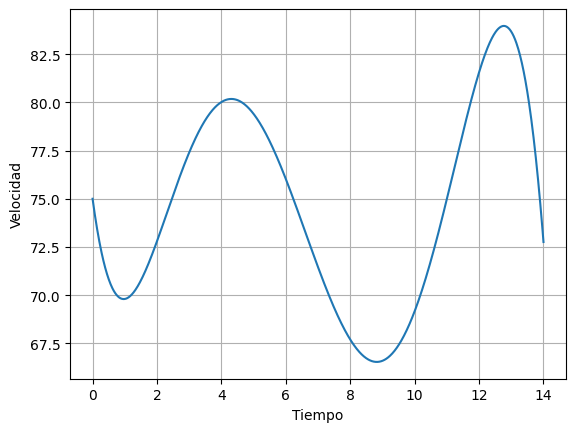

In [ ]:
t_vals = np.array([0,3,5,8,10,13])
d_vals = np.array([0,225,383,623,742,993])
x = np.linspace(0,14,1000)

velocidad = np.gradient(d_vals,t_vals)
print(velocidad)

poli = lagrange(t_vals, velocidad)
plt.plot(x, poli(x))
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.grid()
plt.show()

En t=12, la velocidad será de aproximadamente 81.3

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

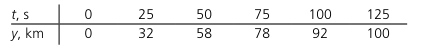

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

En t=0, la velocidad es 1.28, en t=25 la velocidad es 1.16, en t=50 la velocidad es 0.92, en t=75 la velocidad es 0.68, en t=100 la velocidad es 0.44 y en t=125 la velocidad es 0.32
En t=0, la aceleración es -0.004800000000000004, en t=25 la aceleración  es -0.0072, en t=50 la aceleración es -0.009599999999999997, en t=75 la aceleración  es -0.009600000000000001, en t=100 la aceleración es -0.007200000000000001 y en t=125 la aceleración es -0.0048 


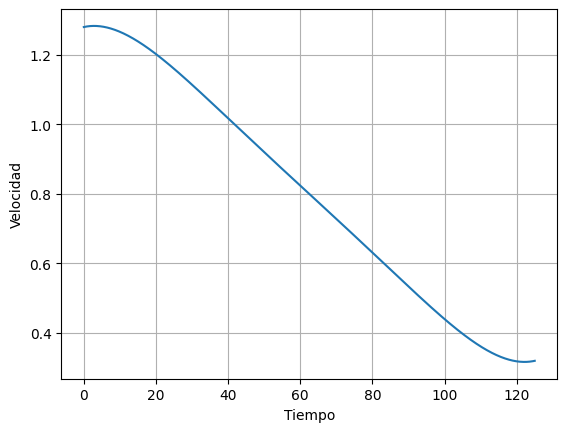

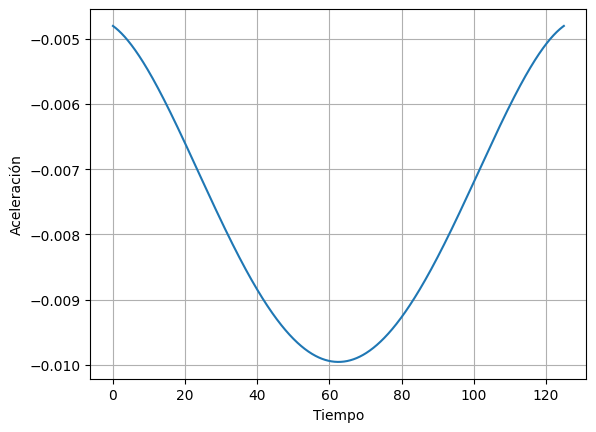

In [ ]:
t_ = np.array([0,25,50,75,100,125])
y_ = np.array([0,32,58,78,92,100])

velocidad = np.gradient(y_,t_)
print(f'En t=0, la velocidad es {velocidad[0]}, en t=25 la velocidad es {velocidad[1]}, en t=50 la velocidad es {velocidad[2]}, en t=75 la velocidad es {velocidad[3]}, en t=100 la velocidad es {velocidad[4]} y en t=125 la velocidad es {velocidad[5]}')

aceleracion = np.gradient(velocidad,t_)
print(f'En t=0, la aceleración es {aceleracion[0]}, en t=25 la aceleración  es {aceleracion[1]}, en t=50 la aceleración es {aceleracion[2]}, en t=75 la aceleración  es {aceleracion[3]}, en t=100 la aceleración es {aceleracion[4]} y en t=125 la aceleración es {aceleracion[5]} ')

v_t = lagrange(t_, velocidad)
a_t = lagrange(t_, aceleracion)

t_lin = np.linspace(0,125,1000)
plt.plot(t_lin, v_t(t_lin))
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.grid()
plt.show()

plt.plot(t_lin, a_t(t_lin))
plt.xlabel('Tiempo')
plt.ylabel('Aceleración')
plt.grid()
plt.show()

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [ ]:
z, R, k, q = sp.symbols('z R k q')

V = (k*q)/(sp.sqrt(z**2 + R**2))

Ez = -sp.diff(V, z)
Ez_simple = sp.simplify(Ez)
print('Campo eléctrico en unidades de kq:')
sp.pprint(Ez_simple)

Campo eléctrico en unidades de kq:
   k⋅q⋅z    
────────────
         3/2
⎛ 2    2⎞   
⎝R  + z ⎠   


In [31]:
def potencial(z,R,k,q):
  return (k*q/np.sqrt(z**2 + R**2))

R_val = 0.1
z_val = 0.1
k_val = 9e9

q_val = float(input('Ingrese el valor de la carga total (Coulombs): '))

dz = 1e-8
z_puntos = np.array([z_val - dz, z_val, z_val + dz])
V_vals = potencial(z_puntos, R_val, k_val, q_val)

E_valor = -np.gradient(V_vals, dz)[1]
print(f'El campo eléctrico en z = {z_val} mm es {E_valor} N/C')

Ingrese el valor de la carga total (Coulombs): 1e-5
El campo eléctrico en z = 0.1 mm es 3181980.5095437914 N/C


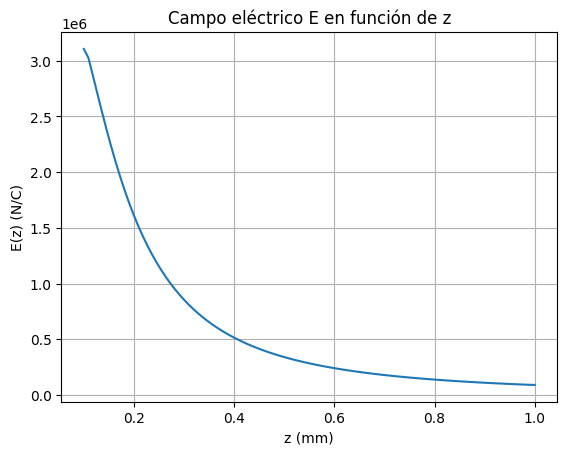

In [34]:
def calc_campo(z_array, R, k, q):
  V_array = potencial(z_array, R, k, q)
  E_array = -np.gradient(V_array, z_array)
  return E_array

z_array = np.linspace(0.1, 1, 100)
E_array = calc_campo(z_array, R_val, k_val, q_val)

plt.plot(z_array, E_array)
plt.title('Campo eléctrico E en función de z')
plt.xlabel('z (mm)')
plt.ylabel('E(z) (N/C)')
plt.grid()
plt.show()